<a href="https://colab.research.google.com/github/KrishSharmila/Assignment-7--Salary-Discrimination/blob/main/Assignment_7_Salary_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Discrimination**

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.

Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

Year. Number of years in current rank.

Degree. Highest degree. 1 for doctorate, 0 for master's.

YSdeg. Years since highest degree was earned.

Salary. Salary/year in dollars.

Tasks

Find the linear regression equation for this data using columns 1-5 to column 6.

Find the selection of columns with the best  R2  score.

Report whether sex is a factor in salary.*italicized text*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [4]:
df=pd.read_fwf("/content/salary.txt",header=None,
               names=['Sex','Rank','Year','Degree','YSdeg','Salary'])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [7]:
x = df.iloc[:,:5]
x

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30
5,0,3,16,1,21
6,1,3,0,0,32
7,0,3,16,1,18
8,0,3,13,0,30
9,0,3,13,0,31


In [9]:
y=df['Salary']
y

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64

In [10]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:
print("Freatures & Coefficent - ",list(zip(x,model.coef_)))

Freatures & Coefficent -  [('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [22]:
x1 = df.columns[0:5]           # ploting all x variables with y 
y1 = df.columns[-1]

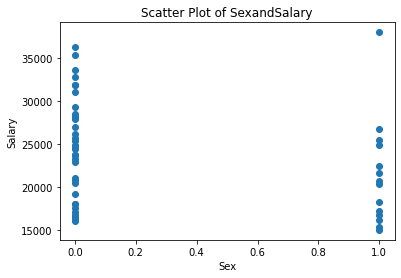

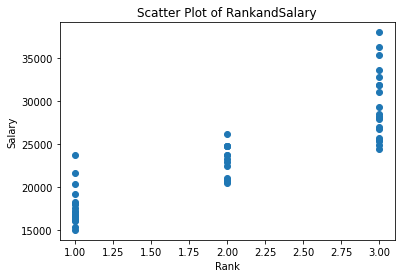

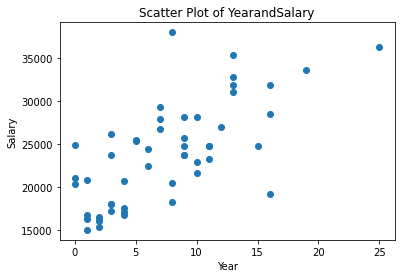

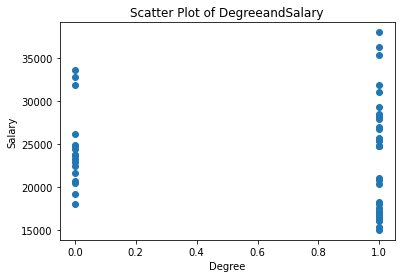

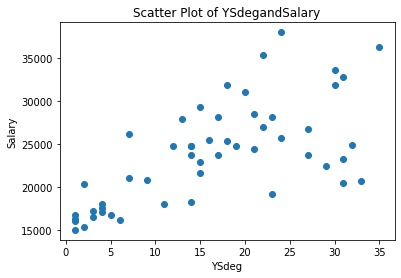

In [23]:
def pllot(x1,y1):
  plt.scatter(df[x1],df[y1])
  plt.xlabel(x1)
  plt.ylabel(y1)
  plt.title("Scatter Plot of " +x1+ "and" +y1)
  plt.show()
for i in x1:
  pllot(i,y1)  

In [24]:
print("r squared:",model.score(x,y))

r squared: 0.8547180674410969


**Report whether sex is a factor in salary**.

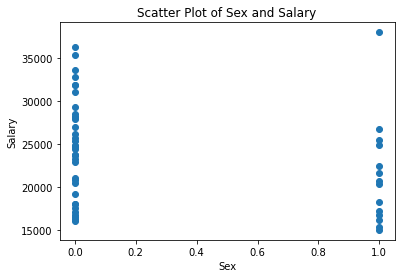

In [26]:
plt.scatter(df['Sex'],df['Salary'])
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title("Scatter Plot of Sex and Salary")
plt.show()